In [13]:
"DWT cleaning applied"
# The jupyter script is used to carry out the analysis of the single run
# this is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
# from the music therapy study using a 12 seconds sliding window
# dataset is resampled due to undersampling during the recording
# ICA, notch and bandpass filtering are implmeneted to mitigate eeg noise
# results: spectogram and average bandpower comparison betwen timepoints per channel per brainwave

In [14]:
from helper import*
from params import*

In [15]:
# SQL parameters
tableName_1 = 'MH_09_ES1_task1'
tableName_2 = 'MH_09_ES2_task1'
task = "Task 1"
query_1 = ("% s % s"%('SELECT * FROM', tableName_1))
query_2 = ("% s % s"%('SELECT * FROM', tableName_2))

In [16]:
# establish connection with music_therapy_eeg database
db_connection = create_db_connection(hostName,userName,userPassword,databaseName)
data_1 = df_to_table_query(db_connection,query_1)
data_2 = df_to_table_query(db_connection,query_2)

MySQL Database connection successful
Query successful
Query successful


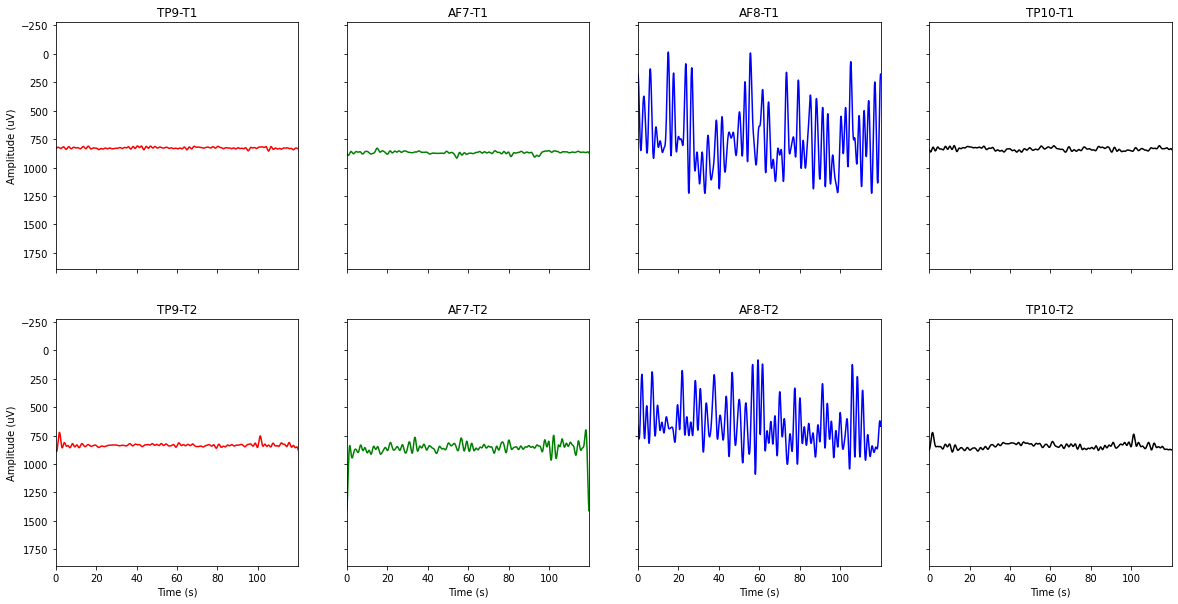

In [17]:
# transform sql extracted table to raw eeg data
rawEEG_1 = (singleTransformToRawEEG(data_1,fs,collection_time,fs_setting))[0]
rawEEG_2 = (singleTransformToRawEEG(data_2,fs,collection_time,fs_setting))[0]
time_s = (singleTransformToRawEEG(data_1,fs,collection_time,fs_setting))[1]
plots(time_s,(np.hstack((rawEEG_1,rawEEG_2))),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(20,10),['r','g','b','k','r','g','b','k'])

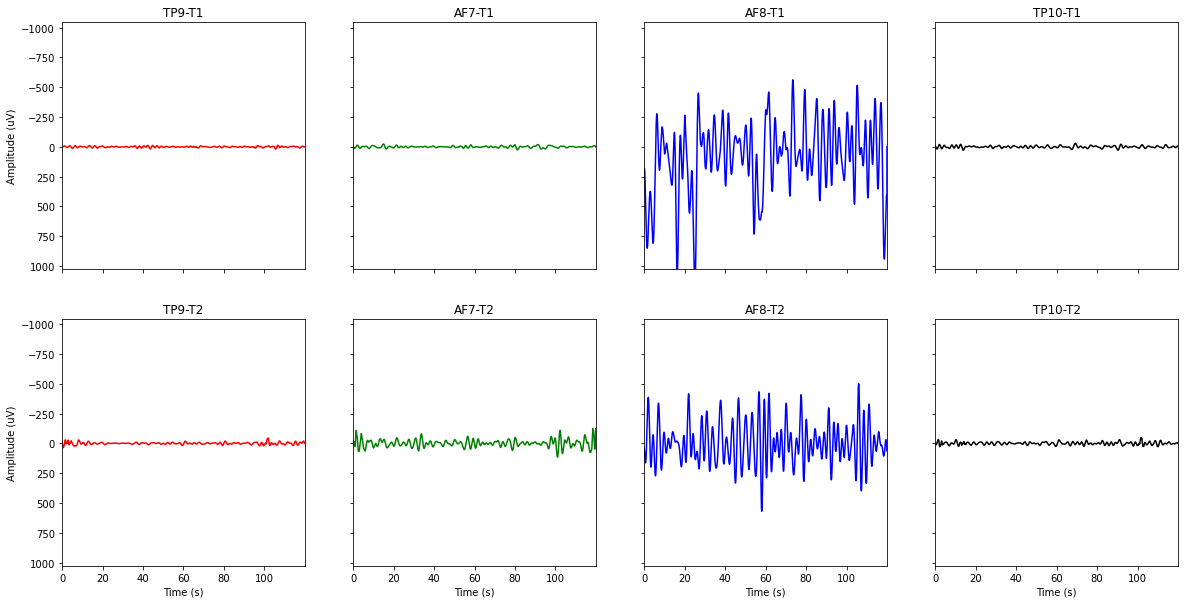

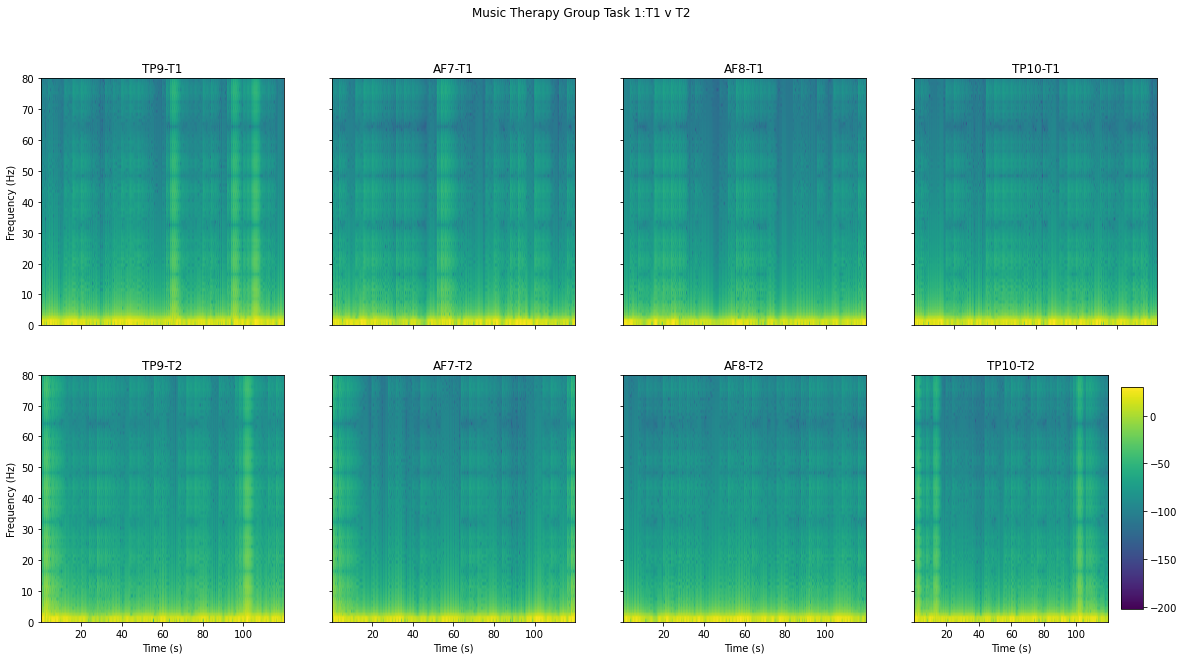

In [18]:
wavelet = ['sym3']
dwtEEG_1 = multiChannelDWT(rawEEG_1,time_s,wavelet)
dwtEEG_2 = multiChannelDWT(rawEEG_2,time_s,wavelet)
plots(time_s,(np.hstack((dwtEEG_1,dwtEEG_2))),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(20,10),['r','g','b','k','r','g','b','k'])
spectogramPlot((np.hstack((dwtEEG_1,dwtEEG_2))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group'+' '+task+':'+'T1 v T2')


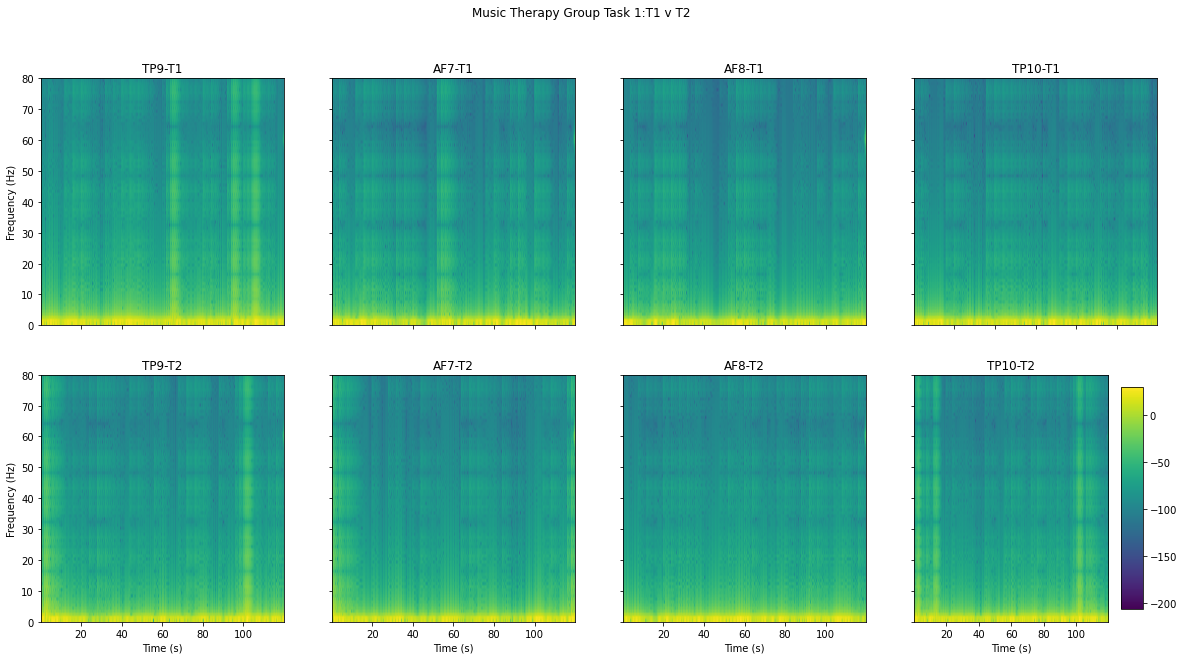

In [19]:
filtering = filters()
noc=filters()
notch_data_1 = noc.notch(dwtEEG_1,line,fs,Q)
notch_data_2 = noc.notch(dwtEEG_2,line,fs,Q)
spectogramPlot((np.hstack((notch_data_1,notch_data_2))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group'+' '+task+':'+'T1 v T2')

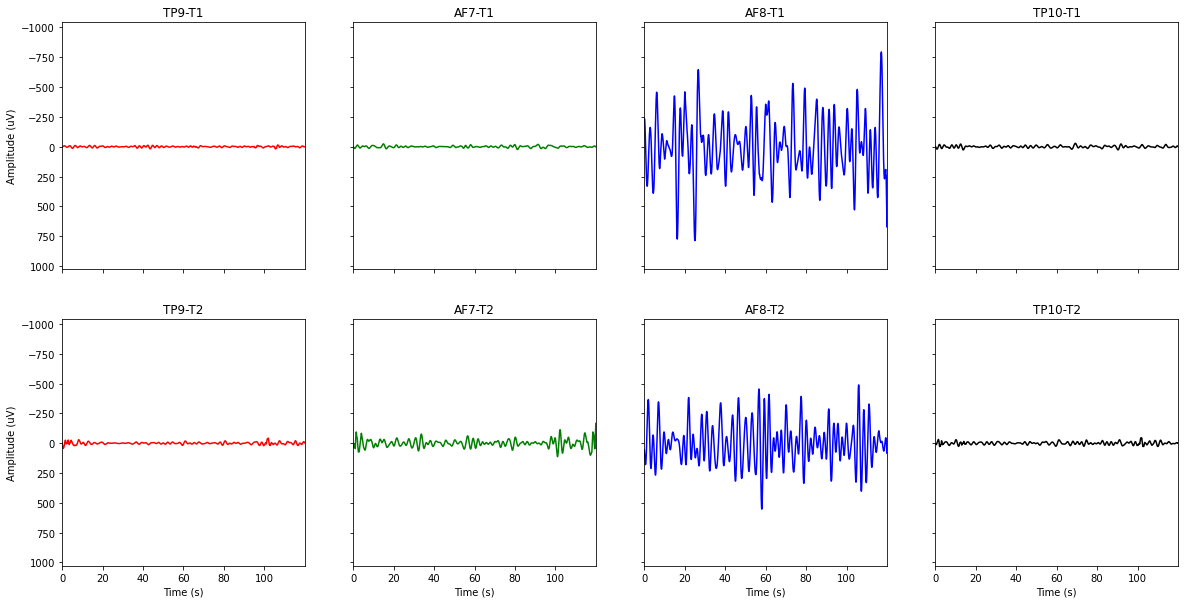

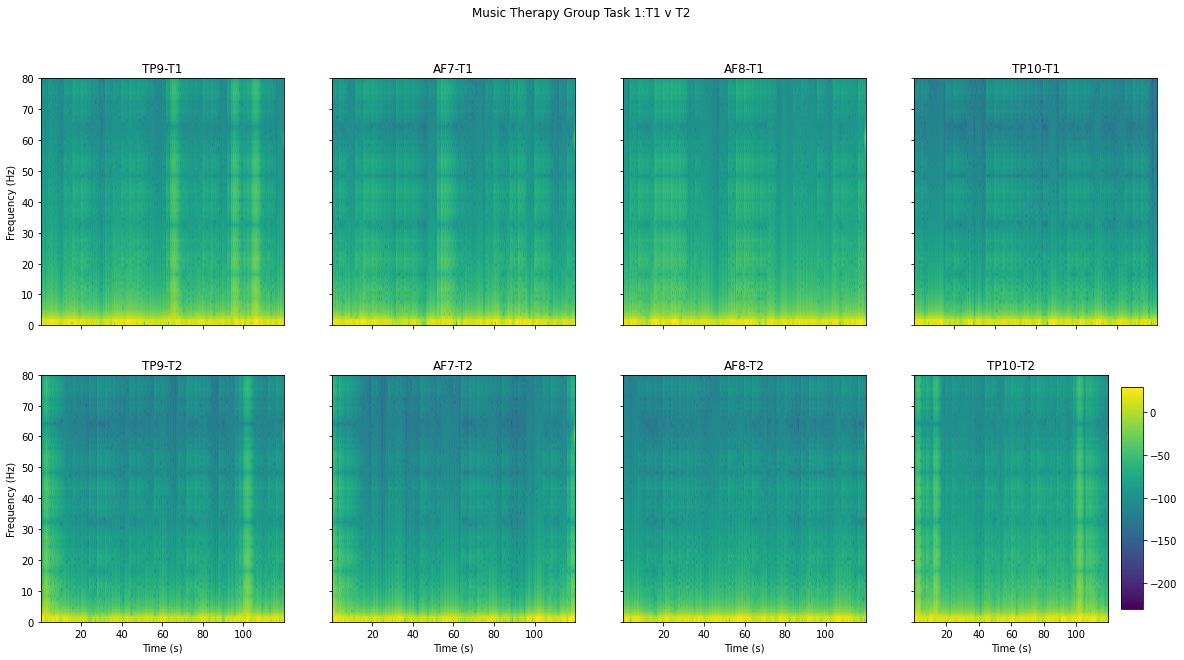

In [20]:
bpData_1 = filtering.butterBandPass(notch_data_1,lowcut,highcut,fs,order)
bpData_2 = filtering.butterBandPass(notch_data_2,lowcut,highcut,fs,order)
plots(time_s,(np.hstack((bpData_1,bpData_2))),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],(20,10),['r','g','b','k','r','g','b','k'])
spectogramPlot((np.hstack((bpData_1,bpData_2))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group'+' '+task+':'+'T1 v T2')

In [21]:
# run sliding window on bandpass filtered data
rw_data_1 = rollingWindow(bpData_1,window_size,step_size)
rw_data_2 = rollingWindow(bpData_2,window_size,step_size)

In [22]:
# compute power spectrum of each window per channel
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

# compute average band power for timepoint 1
deltaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,delta_low,delta_high,win)
thetaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,theta_low,theta_high,win)
alphaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,alpha_low,alpha_high,win)
betaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,beta_low,beta_high,win)
gammaAvgBandPower_1 = averageBandPower(rw_data_1,'3D',fs,gamma_low,gamma_high,win)

# compute average band power for timepoint 2
deltaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,delta_low,delta_high,win)
thetaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,theta_low,theta_high,win)
alphaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,alpha_low,alpha_high,win)
betaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,beta_low,beta_high,win)
gammaAvgBandPower_2 = averageBandPower(rw_data_2,'3D',fs,gamma_low,gamma_high,win)

In [23]:
data_pre = np.vstack((deltaAvgBandPower_1,thetaAvgBandPower_1,alphaAvgBandPower_1,betaAvgBandPower_1,gammaAvgBandPower_1))
data_post = np.vstack((deltaAvgBandPower_2,thetaAvgBandPower_2,alphaAvgBandPower_2,betaAvgBandPower_2,gammaAvgBandPower_2))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))
diff = data_pre - data_post
test = normalityTest(diff)

....Executing Shapiro Wilks Test.......... 

Shapiro Wilks Test: data is not normally distributed, P-Value= 0.0

....confirming Shapiro Wilks Test non-normality result with D’Agostino’s K^2 test.......

Executing D’Agostino’s K^2 Test...
D’Agostino’s K^2 Test: data is not normally distributed, P-Value= 0.0

....confirming D’Agostino’s K^2 Test non-normality result with Anderson-Darling Test.......

Executing Anderson-Darling Test...
Statistic: 799.415
15.000: 0.575, Anderson-Darling Test: data is not normally distributed
10.000: 0.655, Anderson-Darling Test: data is not normally distributed
5.000: 0.786, Anderson-Darling Test: data is not normally distributed
2.500: 0.916, Anderson-Darling Test: data is not normally distributed
1.000: 1.090, Anderson-Darling Test: data is not normally distributed

 Wilcoxon Signed Test utilized to evaluate significance of data
